In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyaw import utils_spectral
from zh1 import zh1

import importlib
importlib.reload(utils_spectral)
importlib.reload(zh1)

<module 'pyaw.zh1' from 'D:\\cleo\\master\\pyaw\\pyaw\\zh1.py'>

In [32]:
fp_efd2a = r"V:\aw\zh1\efd\ulf\2a\20210401_20210630\CSES_01_EFD_1_L2A_A1_175380_20210401_003440_20210401_010914_000.h5"
fp_efd2 = r"V:\aw\zh1\efd\ulf\20210401_20240630\CSES_01_EFD_1_L02_A1_175380_20210401_003440_20210401_010914_000.h5"
fp_scm = r"V:\aw\zh1\scm\ulf\20210401_20210630\CSES_01_SCM_1_L02_A2_175380_20210401_003346_20210401_010912_000.h5"

In [33]:
efd2 = zh1.EFDULF(fp_efd2)
efd2a = zh1.EFDULF(fp_efd2a)
scm = zh1.SCMULF(fp_scm)

In [36]:
start = pd.Timestamp('2021-04-01 00:34:50.601')
end = pd.Timestamp('2021-04-01 00:36:26.856')  # according to ratio fields 'df1c_efd' and 'df1c_scm'
efdscmclip = zh1.EFDSCMClip(start, end, fp_efd2a, fp_scm)

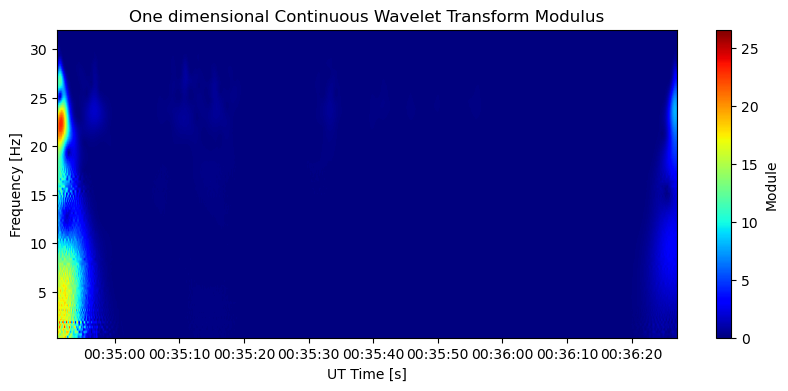

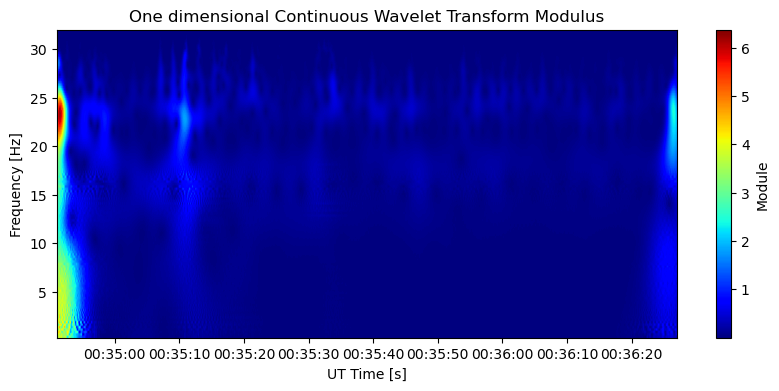

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [37]:
cwt12 = utils_spectral.CWT(efdscmclip.data_preprocessed['e_enu1'], efdscmclip.data_preprocessed['b1_enu2'],
                          sampling_period=1 / 32)
cwt21 = utils_spectral.CWT(efdscmclip.data_preprocessed['e_enu2'], efdscmclip.data_preprocessed['b1_enu1'],
                          sampling_period=1 / 32)
cwt12.plot_module()
cwt21.plot_module()

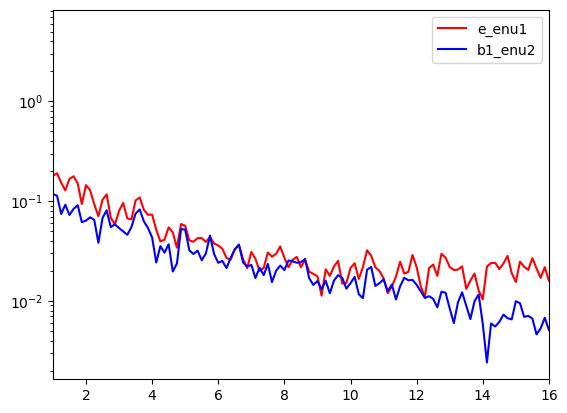

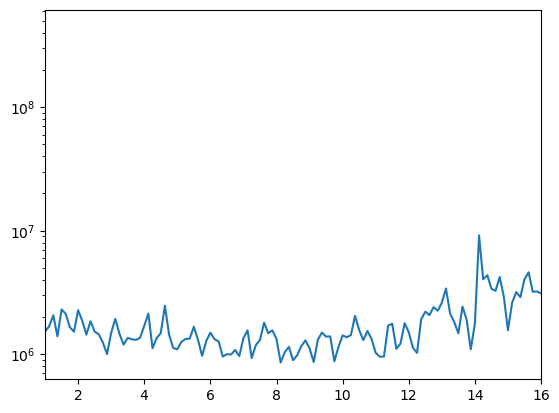

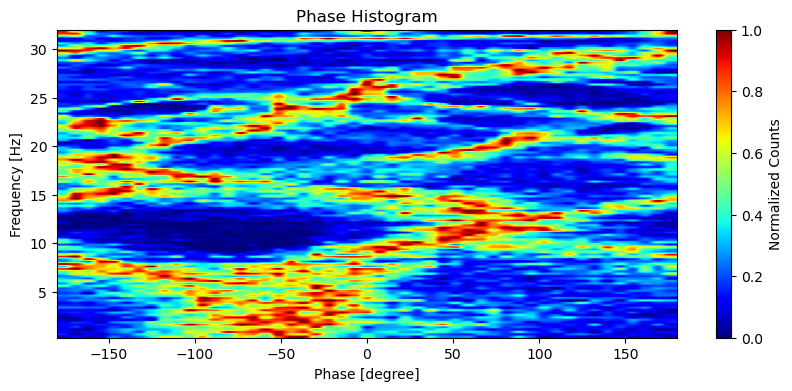

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [30]:
e_psd = utils_spectral.PSD(efdscmclip.data_preprocessed['e_enu1'], efdscmclip.target_fs)
freqs_e, Pxx_e = e_psd.get_psd()
b_psd = utils_spectral.PSD(efdscmclip.data_preprocessed['b1_enu2'], efdscmclip.target_fs)
freqs_b, Pxx_b = b_psd.get_psd()
plt.figure(1)
plt.plot(freqs_e, np.sqrt(Pxx_e), color='r', label='e_enu1')
plt.plot(freqs_b, np.sqrt(Pxx_b), color='b', label='b1_enu2')
plt.xlim([1, 16])
plt.legend()
plt.yscale('log')
plt.show()

plt.figure(2)
assert all(freqs_e == freqs_b), "freqs of e and b should be equal"
plt.plot(freqs_e, np.sqrt(Pxx_e / Pxx_b) * 1e6)
plt.xlim([1, 16])
plt.yscale('log')
plt.show()

cwt_ = utils_spectral.CWT(efdscmclip.data_preprocessed['e_enu1'], efdscmclip.data_preprocessed['b1_enu2'],
                          sampling_period=1 / 32)
# cwt_.plot_module()  # cwt_.plot_phase()  # cwt_.plot_phase_hist_counts()
cwt_.plot_phase_hist_counts()

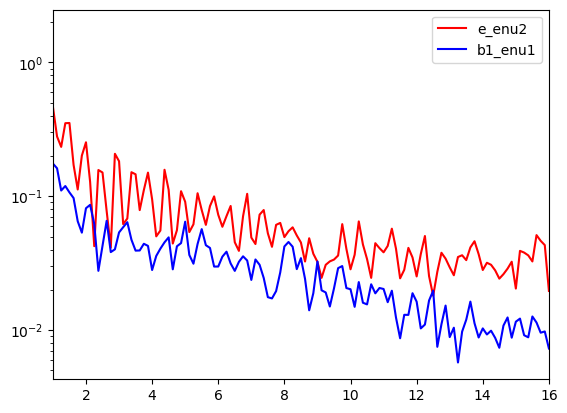

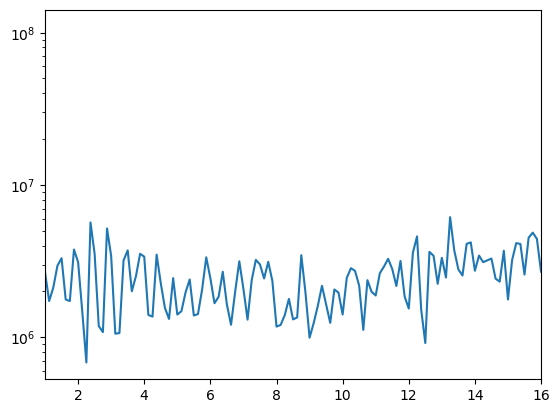

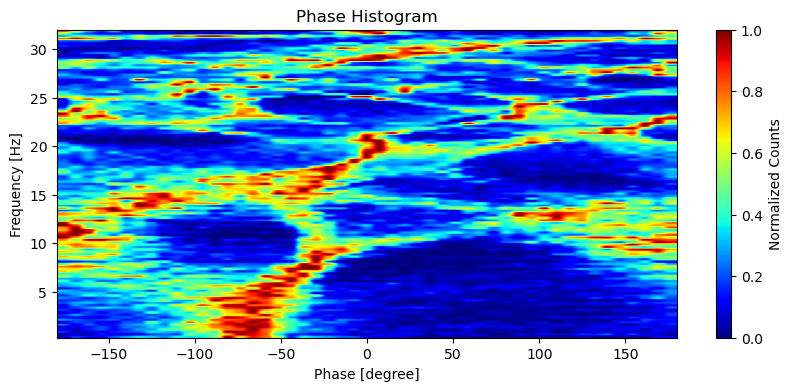

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [31]:
e_psd = utils_spectral.PSD(efdscmclip.data_preprocessed['e_enu2'], efdscmclip.target_fs)
freqs_e, Pxx_e = e_psd.get_psd()
b_psd = utils_spectral.PSD(efdscmclip.data_preprocessed['b1_enu1'], efdscmclip.target_fs)
freqs_b, Pxx_b = b_psd.get_psd()
plt.figure(1)
plt.plot(freqs_e, np.sqrt(Pxx_e), color='r', label='e_enu2')
plt.plot(freqs_b, np.sqrt(Pxx_b), color='b', label='b1_enu1')
plt.xlim([1, 16])
plt.legend()
plt.yscale('log')
plt.show()

plt.figure(2)
assert all(freqs_e == freqs_b), "freqs of e and b should be equal"
plt.plot(freqs_e, np.sqrt(Pxx_e / Pxx_b) * 1e6)
plt.xlim([1, 16])
plt.yscale('log')
plt.show()

cwt_ = utils_spectral.CWT(efdscmclip.data_preprocessed['e_enu2'], efdscmclip.data_preprocessed['b1_enu1'],
                          sampling_period=1 / 32)
# cwt_.plot_module()  # cwt_.plot_phase()  # cwt_.plot_phase_hist_counts()
cwt_.plot_phase_hist_counts()